In [35]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease (1).csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [39]:
clf.fit(X_train,Y_train);

In [40]:
Y_preds = clf.predict(X_test)
Y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [41]:
clf.score(X_train,Y_train)

1.0

In [42]:
clf.score(X_test,Y_test)

0.8360655737704918

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.86      0.86      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [44]:
confusion_matrix(Y_test, Y_preds)

array([[19,  5],
       [ 5, 32]], dtype=int64)

In [45]:
accuracy_score(Y_test, Y_preds)

0.8360655737704918

In [46]:
np.random.seed(42)
score = -1
estimator = 0
for i in range(1,100):
    print(f"Trying with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model Accuracy on test set:{clf.score(X_test, Y_test)*100:.2f}")
    tempscore = (clf.score(X_test,Y_test))*100
    if tempscore>90:
        score = tempscore
        estimator = i
        break

    print(" ")
score, estimator

Trying with 1 estimators...
Model Accuracy on test set:80.33
 
Trying with 2 estimators...
Model Accuracy on test set:70.49
 
Trying with 3 estimators...
Model Accuracy on test set:81.97
 
Trying with 4 estimators...
Model Accuracy on test set:77.05
 
Trying with 5 estimators...
Model Accuracy on test set:83.61
 
Trying with 6 estimators...
Model Accuracy on test set:78.69
 
Trying with 7 estimators...
Model Accuracy on test set:81.97
 
Trying with 8 estimators...
Model Accuracy on test set:78.69
 
Trying with 9 estimators...
Model Accuracy on test set:83.61
 
Trying with 10 estimators...
Model Accuracy on test set:86.89
 
Trying with 11 estimators...
Model Accuracy on test set:81.97
 
Trying with 12 estimators...
Model Accuracy on test set:77.05
 
Trying with 13 estimators...
Model Accuracy on test set:78.69
 
Trying with 14 estimators...
Model Accuracy on test set:83.61
 
Trying with 15 estimators...
Model Accuracy on test set:81.97
 
Trying with 16 estimators...
Model Accuracy on te

(-1, 0)

In [47]:
import pickle
pickle.dump(clf, open("random_forest_model.pkl", "wb"))
clf.score(X_test,Y_test)

0.819672131147541

In [48]:
loaded_model = pickle.load(open("random_forest_model.pkl", "rb"))
loaded_model.score(X_test,Y_test)

0.819672131147541

In [49]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

probs = clf.predict_proba(X_test)
probs[10:], len(probs)

prob_positive = probs[:,1]
prob_positive[:10]

array([0.92929293, 0.45454545, 0.97979798, 0.94949495, 0.80808081,
       0.93939394, 0.78787879, 0.7979798 , 0.01010101, 0.66666667])

In [50]:
fpr, tpr, thresholds = roc_curve(Y_test, prob_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.125     ,
       0.125     , 0.16666667, 0.33333333, 0.33333333, 0.375     ,
       0.375     , 0.58333333, 0.70833333, 0.83333333, 0.91666667,
       1.        ])

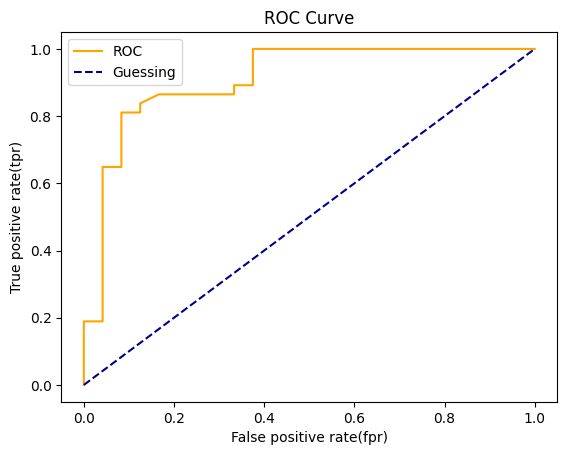

In [51]:
import matplotlib.pyplot as plt
def roc_plot(fpr, tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

roc_plot(fpr,tpr)

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, prob_positive)

0.9104729729729729

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,Y_preds)

array([[19,  5],
       [ 5, 32]], dtype=int64)

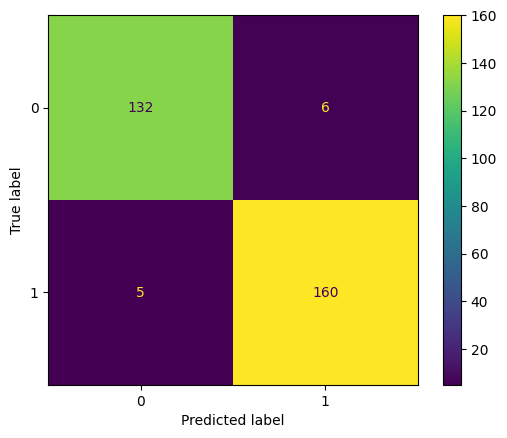

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=Y)

In [55]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(Y_test,Y_preds,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.791667,0.864865,0.836066,0.828266,0.836066
recall,0.791667,0.864865,0.836066,0.828266,0.836066
f1-score,0.791667,0.864865,0.836066,0.828266,0.836066
support,24.000000,37.000000,0.836066,61.000000,61.000000


In [144]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

model = RandomForestClassifier(n_jobs=1).fit(X_train, Y_train)
model.score(X_test,Y_test)

0.9130434782608695

In [145]:
from sklearn.metrics import r2_score

In [146]:
Y_test_mean = np.full(len(Y_test),Y_test.mean())

In [147]:
Y_test_mean[:10]

array([0.58695652, 0.58695652, 0.58695652, 0.58695652, 0.58695652,
       0.58695652, 0.58695652, 0.58695652, 0.58695652, 0.58695652])

In [148]:
r2_score(y_true=Y_test, y_pred = Y_test_mean)

0.0

In [149]:
r2_score(y_true=Y_test, y_pred=Y_test)

1.0

In [150]:
from sklearn.metrics import mean_absolute_error

Y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test,Y_preds)
mae

0.08695652173913043

In [151]:
mae_df = pd.DataFrame(data={"actual values":Y_test,"Predicted values":Y_preds})
mae_df["diff"] = mae_df["actual values"]-mae_df["Predicted values"]
mae_df

,actual values,Predicted values,diff
117,1,1,0
147,1,1,0
294,0,0,0
83,1,0,1
48,1,1,0
155,1,1,0
283,0,1,-1
149,1,1,0
282,0,0,0
176,0,0,0


In [152]:
np.abs(mae_df["diff"]).mean()

0.08695652173913043

In [153]:
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import sklearn.model_selection 

mse = mean_squared_error(Y_test,Y_preds)
mse

0.08695652173913043

In [154]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(model, X,Y,cv=5,scoring = "accuracy")
cv_acc.mean()*100

80.88524590163935

In [155]:
cv_precision = cross_val_score(model,X,Y,cv=5,scoring="precision")
cv_precision.mean()*100

81.51924651924652

In [156]:
cv_recall = cross_val_score(model,X,Y,cv=5,scoring="recall")
cv_recall.mean()*100

85.45454545454545

In [157]:
heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target",axis=1)
Y = heart_disease_shuffled["target"]

train_split = round(0.7*len(heart_disease_shuffled))
valid_split = round(train_split+0.15*len(heart_disease_shuffled))
X_train,Y_train = X[:train_split],Y[:train_split]
X_val,Y_val = X[train_split:valid_split],Y[train_split:valid_split]
X_test,Y_test = X[valid_split:],Y[valid_split:]

len(X_train),len(Y_train),len(X_val),len(Y_val),len(X_test),len(Y_test),len(X),len(Y)

C:\Users\ratee\AppData\Local\Temp\ipykernel_2456\3170170712.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train,Y_train = X[:train_split],Y[:train_split]
C:\Users\ratee\AppData\Local\Temp\ipykernel_2456\3170170712.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_val,Y_val = X[train_split:valid_split],Y[train_split:valid_split]
C:\Users\ratee\AppData\Local\Temp\ipykernel_2456\3170170712.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is

(212, 212, 45, 45, 46, 46, 303, 303)

In [158]:
def evaluate_preds(Y_true,Y_predic):
    acc = accuracy_score(Y_true,Y_predic)
    pre = precision_score(Y_true,Y_predic)
    rec = recall_score(Y_true,Y_predic)
    f1 = f1_score(Y_true,Y_predic)
    print(round(acc,2)*100,round(pre, 2)*100,round(rec, 2)*100,round(f1, 2)*100)

In [159]:
model = RandomForestClassifier().fit(X_train,Y_train)
Y_preds = model.predict(X_val)
evaluate_preds(Y_val,Y_preds)

76.0 73.0 76.0 74.0


In [160]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,100,1200],"max_depth":[None,5,10,20,30],"max_features":["auto","sqrt"],"min_samples_split":[2,4,6],"min_samples_leaf":[1,2,3]}
np.random.seed(42)

rs_model = RandomizedSearchCV(estimator=model,param_distributions=grid,n_iter=10,cv=5, verbose=2).fit(X_train,Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=30, max_

c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, ma

c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   4.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   4.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   4.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   4.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   4.2s


In [161]:
rs_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [162]:
model_best = RandomForestClassifier(n_estimators=1200,min_samples_leaf=2,min_samples_split=1,max_features="sqrt",max_depth=20).fit(X_train,Y_train)

In [163]:
rs_best_preds = model_best.predict(X_test)
evaluate_preds(Y_test,rs_best_preds)

93.0 93.0 96.0 95.0


In [165]:
grid_2 = {'n_estimators': [200, 500, 100],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}


from sklearn.model_selection import GridSearchCV
gs_model = GridSearchCV(estimator=model,param_grid=grid_2,cv=5,verbose=2).fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.9s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.2s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s


c:\Users\ratee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None,

In [166]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [168]:
best_gs = RandomForestClassifier(n_estimators=200,max_depth=None,max_features="sqrt",min_samples_split=6,min_samples_leaf=1).fit(X_train,Y_train)
Y_gs_preds = best_gs.predict(X_test)
evaluate_preds(Y_test,Y_gs_preds)

91.0 93.0 93.0 93.0


In [169]:
import pickle

In [170]:
pickle.dump(model_best,open("best_model_classifer.pkl","wb"))

In [173]:
load_best = pickle.load(open("best_model_classifer.pkl","rb"))

In [175]:
from joblib import dump, load

In [178]:
dump(model_best,filename="best_model_classifer.joblib")

['best_model_classifer.joblib']

In [180]:
load_again = load(filename="best_model_classifer.joblib")